<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -5 to +5 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3. StepLR with step size 7 and gamma value 0.1. 

Target: 
======

In this step

1. In this I increased the parameters a little to make it over 6000. The reason is for me to ensure that parameters play a big role here .
3. Target is to achieve over 99.4% validation accuracy with around 6K parameters and more importantly the consistency 
4. Run it for less than 15 epochs 

Result: 
======
1. Observed Train accuracy: 98.86%
2. Validation accuracy:99.45%
3. Number of parameters: 6,254


Analysis: 
========

1. As expected the model validation accuracy increased to 99.45%
2. The Best part of the model is the way accuracy stabilized from one epoch to another
3. According to me this is the best model i have trained so far of all the steps 
4. Now as I achieved the expected accuracy , let me again try to bring the parameters below 6000 and still achieve accuracy of 99.4%


In [2]:
from model import model10 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [3]:
from model import print_model_summary
dropout_prob = 0.069
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
         Dropout2d-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,080
              ReLU-6           [-1, 12, 28, 28]               0
       BatchNorm2d-7           [-1, 12, 28, 28]              24
         Dropout2d-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 12, 14, 14]           1,296
             ReLU-11           [-1, 12, 14, 14]               0
      BatchNorm2d-12           [-1, 12, 14, 14]              24
        Dropout2d-13           [-1, 12, 14, 14]               0
           Conv2d-14           [-1, 12,

G:\TSAI-ERA\Session 7\model.py:599: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [4]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 64
rotation_range = (-5.0, 5.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [5]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [6]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.069).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.023892516270279884 Batch_id=937 Accuracy=93.62: 100%|█████████████████████████| 938/938 [01:18<00:00, 11.94it/s]



Test set: Average loss: 0.0439, Accuracy: 9862/10000 (98.62%)

Currently Executing Epoch: 2


Loss=0.02661236561834812 Batch_id=937 Accuracy=97.37: 100%|██████████████████████████| 938/938 [01:25<00:00, 10.98it/s]



Test set: Average loss: 0.0388, Accuracy: 9880/10000 (98.80%)

Currently Executing Epoch: 3


Loss=0.013971450738608837 Batch_id=937 Accuracy=97.84: 100%|█████████████████████████| 938/938 [01:17<00:00, 12.08it/s]



Test set: Average loss: 0.0324, Accuracy: 9886/10000 (98.86%)

Currently Executing Epoch: 4


Loss=0.013869430869817734 Batch_id=937 Accuracy=98.05: 100%|█████████████████████████| 938/938 [01:18<00:00, 11.99it/s]



Test set: Average loss: 0.0283, Accuracy: 9910/10000 (99.10%)

Currently Executing Epoch: 5


Loss=0.01728125289082527 Batch_id=937 Accuracy=98.16: 100%|██████████████████████████| 938/938 [01:22<00:00, 11.44it/s]



Test set: Average loss: 0.0287, Accuracy: 9913/10000 (99.13%)

Currently Executing Epoch: 6


Loss=0.021805714815855026 Batch_id=937 Accuracy=98.34: 100%|█████████████████████████| 938/938 [01:20<00:00, 11.72it/s]



Test set: Average loss: 0.0250, Accuracy: 9920/10000 (99.20%)

Currently Executing Epoch: 7


Loss=0.05393250286579132 Batch_id=937 Accuracy=98.45: 100%|██████████████████████████| 938/938 [01:18<00:00, 11.89it/s]



Test set: Average loss: 0.0246, Accuracy: 9926/10000 (99.26%)

Currently Executing Epoch: 8


Loss=0.010315531864762306 Batch_id=937 Accuracy=98.69: 100%|█████████████████████████| 938/938 [01:13<00:00, 12.71it/s]



Test set: Average loss: 0.0212, Accuracy: 9936/10000 (99.36%)

Currently Executing Epoch: 9


Loss=0.0613512247800827 Batch_id=937 Accuracy=98.75: 100%|███████████████████████████| 938/938 [01:08<00:00, 13.61it/s]



Test set: Average loss: 0.0209, Accuracy: 9939/10000 (99.39%)

Currently Executing Epoch: 10


Loss=0.011312115006148815 Batch_id=937 Accuracy=98.78: 100%|█████████████████████████| 938/938 [01:08<00:00, 13.71it/s]



Test set: Average loss: 0.0203, Accuracy: 9939/10000 (99.39%)

Currently Executing Epoch: 11


Loss=0.02045578509569168 Batch_id=937 Accuracy=98.74: 100%|██████████████████████████| 938/938 [01:08<00:00, 13.62it/s]



Test set: Average loss: 0.0204, Accuracy: 9942/10000 (99.42%)

Currently Executing Epoch: 12


Loss=0.017338654026389122 Batch_id=937 Accuracy=98.76: 100%|█████████████████████████| 938/938 [01:06<00:00, 14.02it/s]



Test set: Average loss: 0.0205, Accuracy: 9943/10000 (99.43%)

Currently Executing Epoch: 13


Loss=0.03693922981619835 Batch_id=937 Accuracy=98.83: 100%|██████████████████████████| 938/938 [01:08<00:00, 13.66it/s]



Test set: Average loss: 0.0201, Accuracy: 9945/10000 (99.45%)

Currently Executing Epoch: 14


Loss=0.06712151318788528 Batch_id=937 Accuracy=98.86: 100%|██████████████████████████| 938/938 [01:07<00:00, 13.85it/s]



Test set: Average loss: 0.0199, Accuracy: 9943/10000 (99.43%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [7]:
from utils import plot_loss

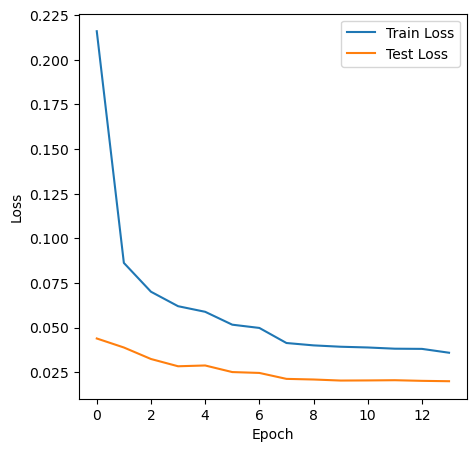

In [8]:
plot_loss(train_losses, test_losses)

In [9]:
from utils import plot_accuracy

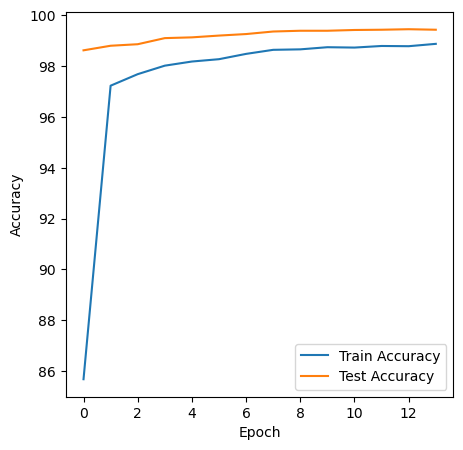

In [10]:
plot_accuracy(train_acc, test_acc)

Summary
=========
